# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
tone_api = os.getenv("tone_key")
tone_url = os.getenv("tone_url")
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100
)

In [7]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100
)

In [10]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []
for article in bitcoin_news["articles"]:
    text = article["content"]
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    
    bitcoin_sentiment.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })

bitcoin_df = pd.DataFrame(bitcoin_sentiment, columns=["compound", "positive", "negative", "neutral"])
bitcoin_df.head()

,compound,positive,negative,neutral
0,0.0000,0.000,0.000,1.000
1,-0.7713,0.000,0.169,0.831
2,-0.1779,0.046,0.067,0.887
3,0.0000,0.000,0.000,1.000
4,-0.3182,0.055,0.091,0.854


In [11]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []
for article in ethereum_news["articles"]:
    text = article["content"]
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    
    ethereum_sentiment.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })

ethereum_df = pd.DataFrame(ethereum_sentiment, columns=["compound", "positive", "negative", "neutral"])
ethereum_df.head()

,compound,positive,negative,neutral
0,-0.3182,0.059,0.093,0.848
1,0.6705,0.188,0.000,0.812
2,-0.4588,0.000,0.083,0.917
3,0.8340,0.236,0.050,0.713
4,-0.1326,0.000,0.044,0.956


In [12]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.065750,0.069130,0.047440,0.883430
std,0.425935,0.068881,0.060644,0.083726
min,-0.895700,0.000000,0.000000,0.694000
25%,-0.250000,0.000000,0.000000,0.837500
50%,0.000000,0.064500,0.000000,0.892500
75%,0.401900,0.096000,0.083000,0.940750
max,0.910000,0.301000,0.265000,1.000000


In [13]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.141145,0.075730,0.041270,0.882970
std,0.429460,0.069882,0.060426,0.083793
min,-0.913600,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.835250
50%,0.153100,0.069000,0.000000,0.887000
75%,0.505200,0.111750,0.066250,0.943000
max,0.862500,0.290000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score at 0.075

Q: Which coin had the highest compound score?

A: The highest mean compound score is from Ethereum at 0.141. The highest max compound score is from Bitcoin at 0.910

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score at 0.301

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words())

# Expand the default stopwords list if necessary
# not necessary for now

In [23]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    clean = regex.sub("", text)
   
    # Create a tokenized list of the words
    clean_words = word_tokenize(clean)
    
    # Lemmatize words into root words
    lemm_words = [lemmatizer.lemmatize(words) for words in clean_words]
   
    # Convert the words to lowercase and remove stopwords
    tokens = [word.lower() for word in lemm_words if word.lower() not in sw]    
    
    return tokens

In [24]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = [tokenizer(article["content"]) for article in bitcoin_news["articles"]]

In [27]:
# Add new column to dataframe. Keeping it separate so that I don't have to rerun the function incase of changes/bug fixing
bitcoin_df["tokens"] = bitcoin_tokens
bitcoin_df.head()

,compound,positive,negative,neutral,tokens
0,0.0000,0.000,0.000,1.000,"[russia, invaded, ukraine, niki, proshin, wa, ..."
1,-0.7713,0.000,0.169,0.831,"[bitcoin, wa, seen, many, libertarianleaning, ..."
2,-0.1779,0.046,0.067,0.887,"[feb, reuters, bitcoin, miner, feeling, heat, ..."
3,0.0000,0.000,0.000,1.000,"[march, reuters, bitcoin, leapt, since, russia..."
4,-0.3182,0.055,0.091,0.854,"[whose, side, cryptocurrency, asked, satoshi, ..."


In [28]:
# Create a new tokens column for Ethereum
ethereum_tokens = [tokenizer(article["content"]) for article in ethereum_news["articles"]]

In [29]:
# Add new column to dataframe. Keeping it separate so that I don't have to rerun the function incase of changes/bug fixing
ethereum_df["tokens"] = ethereum_tokens
ethereum_df.head()

,compound,positive,negative,neutral,tokens
0,-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, way, old, tw..."
1,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."
2,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, million,..."
3,0.8340,0.236,0.050,0.713,"[sound, good, true, youre, wrong, yield, farmi..."
4,-0.1326,0.000,0.044,0.956,"[seems, cant, escape, metaversefrom, facebook,..."


### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [32]:
from collections import Counter
from nltk import ngrams

In [34]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = []
for tokens in bitcoin_df["tokens"]:
    for words in tokens:
        bitcoin_words.append(words)

bitcoin_bigrams = Counter(ngrams(bitcoin_words, n=2))
bitcoin_bigrams.most_common(10)

[(('march', 'reuters'), 13),
 (('feb', 'reuters'), 8),
 (('char', 'london'), 6),
 (('char', 'bitcoin'), 5),
 (('new', 'york'), 5),
 (('reuters', 'bitcoin'), 4),
 (('char', 'march'), 4),
 (('invasion', 'ukraine'), 4),
 (('since', 'russia'), 4),
 (('london', 'feb'), 4)]

In [35]:
# Generate the Ethereum N-grams where N=2
ethereum_words = []
for tokens in ethereum_df["tokens"]:
    for words in tokens:
        ethereum_words.append(words)

ethereum_bigrams = Counter(ngrams(ethereum_words, n=2))
ethereum_bigrams.most_common(10)

[(('char', 'cryptocurrency'), 5),
 (('venture', 'capital'), 5),
 (('hit', 'billion'), 4),
 (('nonfungible', 'token'), 4),
 (('th', 'char'), 4),
 (('cryptocurrency', 'boom'), 3),
 (('boom', 'past'), 3),
 (('past', 'year'), 3),
 (('year', 'helped'), 3),
 (('helped', 'propel'), 3)]

In [37]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [38]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_words, 10)

[('char', 100),
 ('bitcoin', 35),
 ('reuters', 23),
 ('cryptocurrency', 19),
 ('ukraine', 18),
 ('march', 15),
 ('cryptocurrencies', 14),
 ('crypto', 14),
 ('us', 13),
 ('russia', 12)]

In [39]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_words, 10)

[('char', 97),
 ('cryptocurrency', 16),
 ('cryptocurrencies', 16),
 ('ethereum', 15),
 ('year', 15),
 ('ukraine', 14),
 ('market', 13),
 ('digital', 13),
 ('like', 13),
 ('bitcoin', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

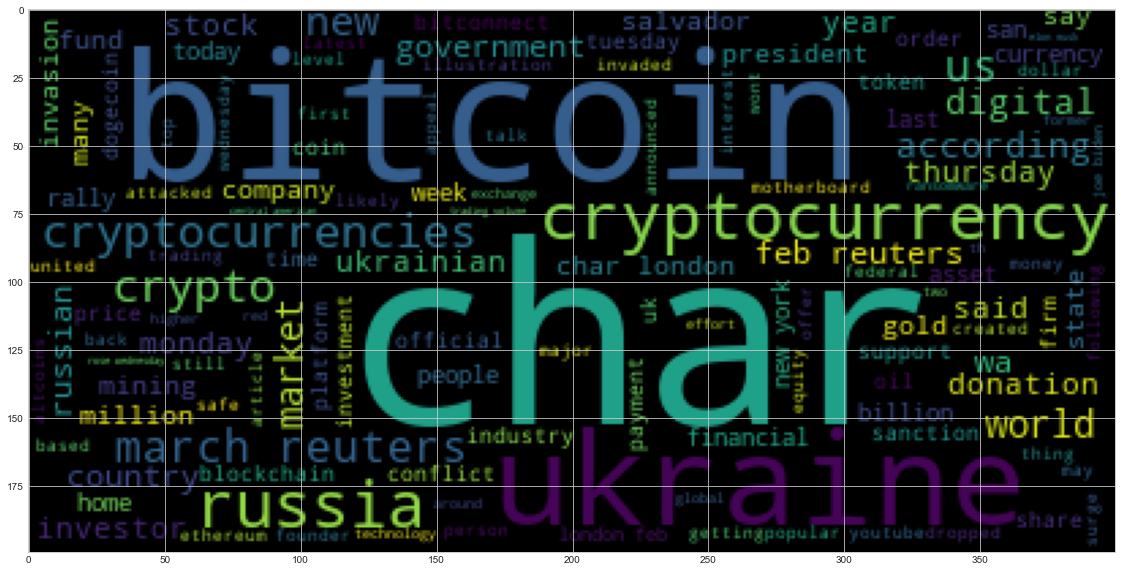

In [41]:
# Generate the Bitcoin word cloud
cloud_text = " ".join(bitcoin_words)
wc = WordCloud().generate(cloud_text)
plt.imshow(wc)

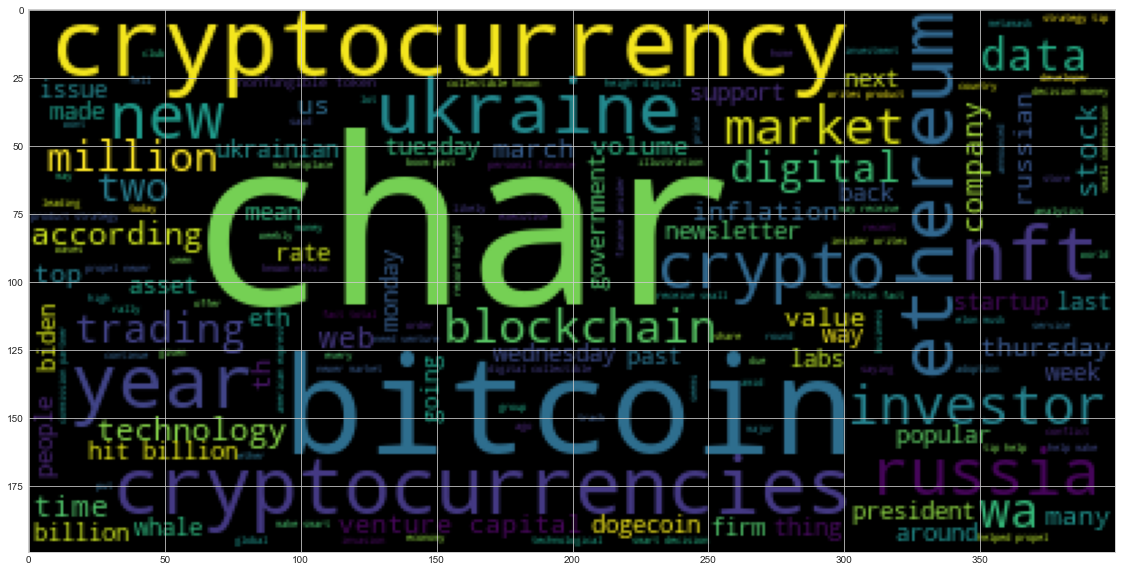

In [42]:
# Generate the Ethereum word cloud
cloud_text = " ".join(ethereum_words)
wc = WordCloud().generate(cloud_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [43]:
import spacy
from spacy import displacy

In [44]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [45]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [60]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ""
for article in bitcoin_news["articles"]:
    bitcoin_text = " ".join([bitcoin_text, article["content"]])

In [61]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [62]:
# Render the visualization
displacy.render(doc, style="ent")

In [66]:
# List all Entities
doc.ents

(Russia,
 Ukraine,
 Niki Proshin,
 a year,
 YouTube,
 TikTok,
 Instagram,
 Russian,
 the New York Times,
 Feb 22,
 Reuters,
 2021,
 thousands,
 March 1,
 Reuters,
 Russia,
 Ukraine,
 Satoshi Nakamoto,
 2008,
 Getty
 Welcome to,
 Nonfungible Tidbits,
 this week,
 Russia,
 Ukraine,
 Ukrainians,
 Russian,
 YouTube,
 Alex Castro,
 Verge,
 BitConnect,
 Nurphoto/Getty,
 Russia,
 last Thursday,
 Ukranian,
 Mexico City,
 Telegr,
 LONDON,
 March 4,
 Reuters,
 Russia,
 Ukraine,
 Russia,
 March 15,
 Reuters,
 U.S.,
 Joe Biden,
 Reuters,
 BITCOIN,
 Summary</li><li>,
 Law firms</li><li>,
 documents</li></ul,
 Ukrainian,
 Tom Lee,
 Ukraine,
 SAN SALVADOR,
 March 11,
 Reuters,
 El Salvador,
 between March 15 and 20,
 Central American,
 Shark Tank,
 Kevin O'Leary's,
 100,000,
 200,000,
 300,000,
 two-week,
 Tuesday,
 Russians,
 Ukrainians,
 SAN SALVADOR,
 Feb 20,
 Reuters,
 El Salvador,
 Nayib Bukele,
 Sunday,
 Congress,
 Central American,
 Motherboard,
 one,
 first,
 Bitcoin,
 Bitcoin 2013,
 San Jose

---

### Ethereum NER

In [67]:
# Concatenate all of the Ethereum text together
ethereum_text = ""
for article in ethereum_news["articles"]:
    ethereum_text = " ".join([ethereum_text, article["content"]])

In [68]:
# Run the NER processor on all of the text
doc = nlp(ethereum_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [69]:
# Render the visualization
displacy.render(doc, style="ent")

In [70]:
# List all Entities
doc.ents

(February,
 Ethereum Name Service,
 ENS,
 May 201,
 Coinbase,
 last year,
 Between 2020 and 2021,
 James Bareham,
 More than $15 million,
 More than $15 million,
 Ukrainian,
 Russia,
 2022,
 Facebook,
 Microsoft,
 over two hours,
 YouTube,
 Waka Flacka Fla,
 the past few years,
 NFT,
 $23 billion,
 TIME,
 weekly,
 Joe Biden,
 Wednesday,
 first,
 the past few years,
 NFT,
 $23 billion,
 the past few years,
 NFT,
 $23 billion,
 Ethereum,
 $450 million,
 Series,
 US,
 over $7 billion,
 Russia,
 Ukraine,
 the days,
 March 11,
 Yuga Labs,
 Meebits,
 Larva Labs,
 more than a dozen,
 Ethereum,
 American Express,
 Tuesday,
 more than $4 million,
 Russia,
 Elliptic,
 Ukraine,
 Russia,
 Elliptic,
 nearly $55 million,
 Russia,
 Ukraine,
 Bloomberg,
 Getty Images,
 Bitcoin, Ethereum,
 DogeCoin,
 Binance,
 June 28, 2021,
 REUTERS,
 Dado Ruvic/Illus,
 only one,
 NFT,
 Russia,
 Ukraine,
 Niki Proshin,
 a year,
 YouTube,
 TikTok,
 Instagram,
 Russian,
 Wednesday, March 23,
 TIME,
 first,
 NFT,
 NFT,
 

---